In [122]:
import pandas as pd
pd.set_option('display.width',4000)
pd.set_option('max_colwidth',4000)
pd.set_option('max_rows',100)
pd.set_option('max_columns',200)

import numpy as np
from pathlib import Path
import sys
import datetime as dt

# import sklearn
# import matplotlib

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sys.path.insert(1,"../") # add dir with helper files

# save and load obj
#from scripts.general_helpers import *


In [273]:

CLEANED = Path("../cleaned")
five_all = pd.read_pickle(CLEANED/"fivethirtyeight_all.xz")


In [276]:
lr_model = pd.read_pickle('data/lr_models.xz')
lr_model.columns

Index(['game_id', 'play_id', 'posteam', 'down', 'qtr', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'weekday', 'roof', 'surface', 'div_game', 'neutral', 'ydstogo', 'game_seconds_remaining', 'yardline_100', 'score_differential', 'no_score_prob', 'opp_fg_prob', 'opp_safety_prob', 'opp_td_prob', 'fg_prob', 'safety_prob', 'td_prob', 'posteam_rest', 'defteam_rest', 'posteam_elo_pre', 'defteam_elo_pre', 'posteam_qbelo_pre', 'defteam_qbelo_pre', 'posteam_qb_value_pre', 'defteam_qb_value_pre', 'posteam_elo_prob', 'defteam_elo_prob', 'posteam_qbelo_prob', 'defteam_qbelo_prob', 'posteam_qb_adj', 'defteam_qb_adj', 'posteam_qb_game_value', 'defteam_qb_game_value', 'posteam_wins', 'pred_proba', 'pred_cls', 'pred_cls_at_t', 'pred_proba_plus', 'pred_cls_plus', 'pred_cls_plus_at_t', 'pred_proba_x', 'pred_cls_x', 'pred_cls_x_at_t', 'wp', 'defteam', 'winning_team', 'home_team', 'away_team', 'play_type', 'yards_gained', 'fourth_down_converted', 'complete_pass', 'punt_attempt', 'punt_inside

In [124]:
CLEANED = Path("../cleaned")
five_all = pd.read_pickle(CLEANED/"fivethirtyeight_all.xz")
five_all['game_date'] = pd.to_datetime(five_all['game_date'])
five_pre = pd.read_pickle(CLEANED/"fivethirtyeight_pre.xz")

five_pre['game_date'] = pd.to_datetime(five_pre['game_date'])
games = pd.read_pickle(CLEANED/"games_basic_all.xz")
pbp_all = pd.read_pickle(CLEANED/"pbp_all.xz")

pbp_all['game_date'] = pd.to_datetime(pbp_all['game_date'])
#a `timeout` is `play_type` == `no_play`

pbp_pre = pd.read_pickle(CLEANED/"pbp_pre.xz")

pbp_pre['game_date'] = pd.to_datetime(pbp_pre['game_date'])
# can join to games
# has end of game / season info

fastr_all = pd.read_pickle(CLEANED/"fastr_all.xz")

fastr_all['game_date'] = pd.to_datetime(fastr_all['game_date']).dt.date
fastr_all['game_date'] = pd.to_datetime(fastr_all['game_date'])
fastr_pre = pd.read_pickle(CLEANED/"fastr_pre.xz")

fastr_pre['game_date'] = pd.to_datetime(fastr_pre['game_date']).dt.date
fastr_pre['game_date'] = pd.to_datetime(fastr_pre['game_date'])
fastr_standings = pd.read_pickle(CLEANED/"fastr_standings_all.xz")
DATA = Path("../data")
  


In [212]:
team_colors = pd.read_csv(DATA/"teamcolors.csv")
merged_pbp_fastr = pbp_pre.merge(fastr_pre,
                                 how="outer",
                                 left_on=["game_id","home_team","away_team"],#"game_date"],
                                 right_on=["game_id","home_team","away_team"])#,#"game_date"],
                                 #indicator=True)
#
#merged_pbp_fastr.rename(columns={"game_date_y":"game_date"},inplace=True)

#merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"]).dt.date
#merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"])
#fd_df = merged_pbp_fastr[merged_pbp_fastr["down"]== 4]

In [213]:
merged_pbp_fastr = merged_pbp_fastr.drop(columns=["game_date_x"])

In [214]:
merged_pbp_fastr.rename(columns={"game_date_y":"game_date"},inplace=True)
merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"]).dt.date
merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"])

In [270]:
lr_model.describe

<bound method NDFrame.describe of            game_id  play_id posteam  down  qtr  posteam_timeouts_remaining  defteam_timeouts_remaining   weekday      roof     surface  div_game  neutral  ydstogo  game_seconds_remaining  yardline_100  score_differential  no_score_prob  opp_fg_prob  opp_safety_prob  opp_td_prob   fg_prob  safety_prob   td_prob  posteam_rest  defteam_rest  posteam_elo_pre  defteam_elo_pre  posteam_qbelo_pre  defteam_qbelo_pre  posteam_qb_value_pre  defteam_qb_value_pre  posteam_elo_prob  defteam_elo_prob  posteam_qbelo_prob  defteam_qbelo_prob  posteam_qb_adj  defteam_qb_adj  posteam_qb_game_value  defteam_qb_game_value  posteam_wins  pred_proba  pred_cls  pred_cls_at_t  pred_proba_plus  pred_cls_plus  pred_cls_plus_at_t  pred_proba_x  pred_cls_x  pred_cls_x_at_t        wp defteam winning_team home_team away_team play_type  yards_gained  fourth_down_converted  complete_pass  punt_attempt  punt_inside_twenty  punt_in_endzone  punt_out_of_bounds _merge  home_team_pred_pro

In [128]:
DATA = Path("../data")
  
team_colors = pd.read_csv(DATA/"teamcolors.csv")

fg = pd.read_csv(DATA/'FG_WINP.csv')

In [346]:
fg = pd.read_csv(CLEANED/'FG_WINP.csv')

In [347]:
punt_df = pd.read_csv(CLEANED/'Punt_WINP.csv')

In [348]:
run_pass = pd.read_csv(CLEANED/'PR_WINP.csv')

In [351]:
run_pass.columns

Index(['game_id', 'play_id', 'down', 'play_type', 'yardline_100', 'season', 'pass_prob', 'run_prob', 'defteam_first_down_ep_coef', 'defteam_pass_failed_ep', 'defteam_run_failed_ep', 'posteam_pass_failed_wp_delta', 'posteam_run_failed_wp_delta', 'posteam_first_down_ep_coef', 'posteam_pass_converted_ep', 'posteam_run_converted_ep', 'posteam_pass_convert_wp_delta', 'posteam_run_convert_wp_delta'], dtype='object')

In [ ]:
'posteam_pass_failed_wp_delta', 'posteam_run_failed_wp_delta', 'posteam_pass_convert_wp_delta', 'posteam_run_convert_wp_delta'

In [350]:
punt_df.columns

Index(['Unnamed: 0', 'game_id', 'play_id', 'down', 'play_type', 'yardline_100', 'season', 'posteam_punt_avg', 'defteam_punt_return_avg', 'defteam_first_down_ep_coef', 'defteam_punt_rtn_yardline_100', 'defteam_punt_rtn_ep', 'posteam_punt_wp_delta'], dtype='object')

In [187]:
fg.columns


Index(['game_id', 'play_id', 'down', 'play_type', 'yardline_100', 'season', 'defteam_fg_made_ep', 'posteam_fg_made_wp_delta', 'defteam_first_down_ep_coef', 'defteam_fg_missed_ep', 'posteam_fg_missed_wp_delta'], dtype='object')

In [352]:
cols = ['game_id', 'play_id', 'down', 'yardline_100', 'season', 'posteam_fg_made_wp_delta', 'posteam_fg_missed_wp_delta', 'posteam_punt_wp_delta','posteam_pass_failed_wp_delta', 'posteam_run_failed_wp_delta', 'posteam_pass_convert_wp_delta', 'posteam_run_convert_wp_delta']

cols_n = ['game_id', 'play_id', 'down', 'yardline_100', 'season', 'defteam_fg_made_ep', 'posteam_fg_made_wp_delta', 'posteam_fg_missed_wp_delta', 'posteam_punt_wp_delta']

In [353]:
fg_punt_df = fg.merge(punt_df, on=['game_id','play_id','down','yardline_100','season'], how='inner')

In [354]:
play_prob= fg_punt_df.merge(run_pass, on=['game_id','play_id','down','yardline_100','season'], how='inner')

In [355]:
play_prob.columns

Index(['game_id', 'play_id', 'down', 'play_type_x', 'yardline_100', 'season', 'defteam_fg_made_ep', 'posteam_fg_made_wp_delta', 'defteam_first_down_ep_coef_x', 'defteam_fg_missed_ep', 'posteam_fg_missed_wp_delta', 'Unnamed: 0', 'play_type_y', 'posteam_punt_avg', 'defteam_punt_return_avg', 'defteam_first_down_ep_coef_y', 'defteam_punt_rtn_yardline_100', 'defteam_punt_rtn_ep', 'posteam_punt_wp_delta', 'play_type', 'pass_prob', 'run_prob', 'defteam_first_down_ep_coef', 'defteam_pass_failed_ep', 'defteam_run_failed_ep', 'posteam_pass_failed_wp_delta', 'posteam_run_failed_wp_delta', 'posteam_first_down_ep_coef', 'posteam_pass_converted_ep', 'posteam_run_converted_ep', 'posteam_pass_convert_wp_delta', 'posteam_run_convert_wp_delta'], dtype='object')

In [129]:
team_colors

,team,color,color2,color3,color4
0,ARI,#97233f,#000000,#ffb612,#a5acaf
1,ARZ,#97233f,#000000,#ffb612,#a5acaf
2,ATL,#a71930,#000000,#a5acaf,#a30d2d
3,BAL,#241773,#000000,#9e7c0c,#c60c30
4,BLT,#241773,#000000,#9e7c0c,#c60c30
5,BUF,#00338d,#c60c30,#0c2e82,#d50a0a
6,CAR,#0085ca,#000000,#bfc0bf,#0085ca
7,CHI,#0b162a,#c83803,#0b162a,#c83803
8,CIN,#000000,#fb4f14,#000000,#d32f1e
9,CLE,#fb4f14,#22150c,#a5acaf,#d32f1e


In [215]:
merged_pbp_fastr = pbp_pre.merge(fastr_pre,
                                 how="outer",
                                 left_on=["game_id","home_team","away_team"],#"game_date"],
                                 right_on=["game_id","home_team","away_team"])#,#"game_date"],
                                 #indicator=True)
merged_pbp_fastr = merged_pbp_fastr.drop(columns=["game_date_x"])
merged_pbp_fastr.rename(columns={"game_date_y":"game_date"},inplace=True)

merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"]).dt.date
merged_pbp_fastr["game_date"] = pd.to_datetime(merged_pbp_fastr["game_date"])


In [131]:
#merged_pbp_fastr 
from pathlib import Path  
filepath = Path('..data/data_team.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
merged_pbp_fastr.to_csv(filepath) 

In [360]:
merged_pbp_fastr.columns

Index(['game_id', 'play_id', 'play_type', 'home_team', 'away_team', 'posteam', 'defteam', 'game_half', 'game_seconds_remaining', 'drive', 'sp', 'qtr', 'down', 'goal_to_go', 'ydstogo', 'ydsnet', 'yardline_100', 'side_of_field', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'posteam_score', 'defteam_score', 'score_differential', 'no_score_prob', 'opp_fg_prob', 'opp_safety_prob', 'opp_td_prob', 'fg_prob', 'safety_prob', 'td_prob', 'extra_point_prob', 'two_point_conversion_prob', 'old_game_id', 'season', 'game_type', 'week', 'game_date', 'weekday', 'gametime', 'location', 'away_rest', 'home_rest', 'away_moneyline', 'home_moneyline', 'spread_line', 'away_spread_odds', 'home_spread_odds', 'total_line', 'under_odds', 'over_odds', 'div_game', 'roof', 'surface', 'temp', 'wind', 'away_qb_id', 'home_qb_id', 'away_qb_name', 'home_qb_name', 'away_coach', 'home_coach', 'referee', 'stadium_id', 'stadium'], dtype='object')

In [361]:

fd_df = merged_pbp_fastr[merged_pbp_fastr["down"]== 4]



In [369]:
prob_cols = ['game_id', 'play_id', 'down', 'yardline_100', 'season', 'posteam_fg_made_wp_delta',  'posteam_fg_missed_wp_delta',  'posteam_punt_wp_delta', 'posteam_pass_failed_wp_delta', 'posteam_run_failed_wp_delta', 'posteam_pass_convert_wp_delta', 'posteam_run_convert_wp_delta']

In [370]:
play_prob = play_prob[prob_cols]

In [372]:
final_data = fd_df.merge(play_prob,how='inner',on=['game_id','play_id','season','down','yardline_100'])

In [378]:
final_data.game_seconds_remaining

0        3507.0
1        3394.0
2        3205.0
3        3108.0
4        3002.0
          ...  
41285    1849.0
41286    1686.0
41287     154.0
41288      42.0
41289      12.0
Name: game_seconds_remaining, Length: 41290, dtype: float64

In [379]:
final_data2009 = final_data[final_data['season']==2009]
final_data2010 = final_data[final_data['season']==2010]
final_data2011 = final_data[final_data['season']==2011]
final_data2012 = final_data[final_data['season']==2012]
final_data2013 = final_data[final_data['season']==2013]
final_data2014 = final_data[final_data['season']==2014]
final_data2015 = final_data[final_data['season']==2015]
final_data2016 = final_data[final_data['season']==2016]
final_data2017 = final_data[final_data['season']==2017]
final_data2018 = final_data[final_data['season']==2018]
final_data2019 = final_data[final_data['season']==2019]

In [237]:
final_data2009['season'].unique()

array([2009])

In [380]:

from pathlib import Path  
filepath = Path('data/final_data_2009.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2009.to_csv(filepath) 

In [381]:

from pathlib import Path  
filepath = Path('data/final_data_2010.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2010.to_csv(filepath) 

In [382]:

from pathlib import Path  
filepath = Path('data/final_data_2011.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2011.to_csv(filepath) 

In [383]:

from pathlib import Path  
filepath = Path('data/final_data_2012.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2012.to_csv(filepath) 

In [384]:

from pathlib import Path  
filepath = Path('data/final_data_2013.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2013.to_csv(filepath) 

In [385]:

from pathlib import Path  
filepath = Path('data/final_data_2014.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2014.to_csv(filepath) 

In [386]:

from pathlib import Path  
filepath = Path('data/final_data_2015.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2015.to_csv(filepath) 

In [387]:

from pathlib import Path  
filepath = Path('data/final_data_2016.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2016.to_csv(filepath) 


from pathlib import Path  
filepath = Path('data/final_data_2017.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2017.to_csv(filepath) 


from pathlib import Path  
filepath = Path('data/final_data_2018.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2018.to_csv(filepath) 


from pathlib import Path  
filepath = Path('data/final_data_2019.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
final_data2019.to_csv(filepath) 

In [272]:
lr_model.columns

Index(['game_id', 'play_id', 'posteam', 'down', 'qtr', 'posteam_timeouts_remaining', 'defteam_timeouts_remaining', 'weekday', 'roof', 'surface', 'div_game', 'neutral', 'ydstogo', 'game_seconds_remaining', 'yardline_100', 'score_differential', 'no_score_prob', 'opp_fg_prob', 'opp_safety_prob', 'opp_td_prob', 'fg_prob', 'safety_prob', 'td_prob', 'posteam_rest', 'defteam_rest', 'posteam_elo_pre', 'defteam_elo_pre', 'posteam_qbelo_pre', 'defteam_qbelo_pre', 'posteam_qb_value_pre', 'defteam_qb_value_pre', 'posteam_elo_prob', 'defteam_elo_prob', 'posteam_qbelo_prob', 'defteam_qbelo_prob', 'posteam_qb_adj', 'defteam_qb_adj', 'posteam_qb_game_value', 'defteam_qb_game_value', 'posteam_wins', 'pred_proba', 'pred_cls', 'pred_cls_at_t', 'pred_proba_plus', 'pred_cls_plus', 'pred_cls_plus_at_t', 'pred_proba_x', 'pred_cls_x', 'pred_cls_x_at_t', 'wp', 'defteam', 'winning_team', 'home_team', 'away_team', 'play_type', 'yards_gained', 'fourth_down_converted', 'complete_pass', 'punt_attempt', 'punt_inside

In [306]:
pred_cols = ['game_id','play_id','home_team_pred_proba_plus','away_team_pred_proba_plus','game_seconds_remaining']
lr_model = lr_model[pred_cols]
lr_model1 = lr_model[lr_model.play_id<2000]
lr_model1_1 = lr_model [ (lr_model['play_id']>=2000)&(lr_model['play_id']<4000)]

In [311]:
lr_model1_1

,game_id,play_id,home_team_pred_proba_plus,away_team_pred_proba_plus,game_seconds_remaining
71,2009091000,2029,0.555612,0.444388,1827.0
72,2009091000,2058,0.584704,0.415296,1821.0
73,2009091000,2084,0.562288,0.437712,1816.0
74,2009091000,2160,0.460979,0.539021,1801.0
75,2009091000,2234,0.474710,0.525290,1795.0
...,...,...,...,...,...
497268,2019122915,3877,0.364004,0.635996,42.0
497269,2019122915,3901,0.509578,0.490422,23.0
497270,2019122915,3955,0.450633,0.549367,22.0
497271,2019122915,3977,0.421040,0.578960,15.0


In [312]:
lr_model2 = lr_model[(lr_model['play_id']>=4000)&(lr_model['play_id']<6000)]
lr_model2_2 = lr_model[(lr_model['play_id']>=6000)&(lr_model['play_id']<8000)]
lr_model3 = lr_model[(lr_model['play_id']>=8000)&(lr_model['play_id']<10000)]
lr_model3_3 = lr_model[(lr_model['play_id']>=10000)&(lr_model['play_id']<12000)]
lr_model4 = lr_model[(lr_model['play_id']>=12000)&(lr_model['play_id']<14000)]
lr_model4_4 = lr_model[(lr_model['play_id']>=14000)&(lr_model['play_id']<16000)]
lr_model5 = lr_model[(lr_model['play_id']>=16000)&(lr_model['play_id']<18000)]
lr_model5_5 = lr_model[(lr_model['play_id']>=18000)&(lr_model['play_id']<20000)]
lr_model6 = lr_model[(lr_model['play_id']>=20000)&(lr_model['play_id']<22000)]
lr_model6_6 = lr_model[(lr_model['play_id']>=22000)&(lr_model['play_id']<24000)]
lr_model7 = lr_model[(lr_model['play_id']>=24000)&(lr_model['play_id']<26000)]
lr_model7_7 = lr_model[(lr_model['play_id']>=26000)&(lr_model['play_id']<28000)]
lr_model8 = lr_model[(lr_model['play_id']>=28000)&(lr_model['play_id']<30000)]
lr_model8_8 = lr_model[(lr_model['play_id']>=30000)&(lr_model['play_id']<32000)]
lr_model9 = lr_model[(lr_model['play_id']>=32000)&(lr_model['play_id']<34000)]
lr_model9_9 = lr_model[(lr_model['play_id']>=34000)&(lr_model['play_id']<36000)]
lr_model10 = lr_model[(lr_model['play_id']>=36000)&(lr_model['play_id']<38000)]
lr_model10_1 = lr_model[(lr_model['play_id']>=38000)&(lr_model['play_id']<40000)]

In [388]:
fd_df.T

,4,8,14,20,24,41,52,65,100,104,111,119,124,131,145,146,153,191,199,209,232,237,251,259,263,267,271,298,302,310,324,343,353,360,379,386,390,394,409,420,455,456,462,469,507,514,536,550,557,570,581,606,616,644,648,652,664,668,674,679,688,696,704,713,722,726,731,736,740,747,751,764,772,792,797,801,810,811,815,820,827,841,872,877,882,894,900,916,921,926,932,937,984,989,1000,1006,1015,1019,1043,1047,...,497405,497415,497424,497436,497447,497451,497463,497473,497480,497497,497503,497515,497523,497553,497554,497562,497573,497622,497629,497638,497643,497647,497652,497653,497661,497665,497669,497676,497684,497696,497702,497715,497723,497729,497753,497764,497768,497772,497793,497806,497827,497833,497837,497841,497845,497856,497872,497893,497912,497920,497930,497944,497949,497950,497959,497967,497973,497987,497996,498009,498017,498028,498040,498051,498056,498080,498085,498089,498101,498106,498112,498114,498127,498142,498149,498153,498161,498165,498186,498193,498197,498206,498210,498230,498237,498259,498272,498290,498362,498376,498387,498395,498413,498425,498426,498442,498450,498514,498529,498534
game_id,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091000,2009091300,2009091300,2009091300,2009091300,2009091300,2009091300,2009091300,2009091300,2009091300,2009091300,2009091300,2009091300,2009091300,2009091300,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091301,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091302,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091303,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091304,2009091305,2009091305,...,2019122909,2019122909,2019122909,2019122909,2019122910,2019122910,2019122910,2019122910,2019122910,2019122910,2019122910,2019122910,2019122910,2019122910,2019122910,2019122910,2019122910,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122911,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122912,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122913,2019122914,2019122914,2019122914,2019122914,2019122914,2019122914,2019122914,2019122914,2019122914,2019122914,2019122914,2019122915,2019122915,2019122915,2019122915,2019122915,2019122915,2019122915,2019122915,2019122915,2019122915,2019122915
play_id,139,228,365,522,603,998,1279,1633,2443,2563,2713,2911,3016,3179,3504,3527,3698,352,554,786,1302,1414,1792,1956,2044,2141,2230,2832,2922,3107,3451,122,365,505,945,1137,1248,1334,1696,1935,2729,2756,2879,3029,3916,4071,369,669,871,1168,1438,2088,2304,2936,3030,3130,3412,3496,3642,3762,3977,4149,4319,180,409,499,623,742,893,1038,1135,1455,1631,2111,2236,2320,2547,2578,2679,2792,2958,3298,213,324,447,706,827,1369,1468,1577,1695,1842,2893,2998,3279,3411,3611,3712,200,296,...,2913,3174,3382,3627,189,289,567,867,1023,1411,1536,1807,1970,2661,2688,2881,3141,314,497,701,811,931,1040,1070,1270,1357,1451,1618,1793,2099,2216,2549,2750,2894,3434,3672,3762,3864,4335,4661,491,616,701,7

In [395]:
lr = lr_model10 = lr_model[lr_model.play_id==2029]

In [396]:
lr

,game_id,play_id,home_team_pred_proba_plus,away_team_pred_proba_plus,game_seconds_remaining
71,2009091000,2029,0.555612,0.444388,1827.0
10320,2009101200,2029,0.338524,0.661476,1794.0
17332,2009110810,2029,0.720669,0.279331,1812.0
28184,2009121311,2029,0.465572,0.534428,1916.0
33870,2010010306,2029,0.177609,0.822391,1680.0
39485,2010091914,2029,0.984020,0.015980,1805.0
42055,2010100301,2029,0.502894,0.497106,1863.0
43303,2010100310,2029,0.143330,0.856670,1618.0
43957,2010101001,2029,0.872566,0.127434,1837.0
47757,2010102400,2029,0.972942,0.027058,1832.0


In [313]:

from pathlib import Path  
filepath = Path('data/lr_model1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model1.to_csv(filepath) 

In [314]:

from pathlib import Path  
filepath = Path('data/lr_model1_1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model1_1.to_csv(filepath) 

In [315]:
from pathlib import Path  
filepath = Path('data/lr_model2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model2.to_csv(filepath) 

In [316]:
from pathlib import Path  
filepath = Path('data/lr_model2_2.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model2_2.to_csv(filepath) 

In [317]:
from pathlib import Path  
filepath = Path('data/lr_model3.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model3.to_csv(filepath) 

In [318]:
from pathlib import Path  
filepath = Path('data/lr_model3_3.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model3_3.to_csv(filepath) 

In [319]:
from pathlib import Path  
filepath = Path('data/lr_model4.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model4.to_csv(filepath) 

In [320]:
from pathlib import Path  
filepath = Path('data/lr_model4_4.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model4_4.to_csv(filepath) 

In [321]:
from pathlib import Path  
filepath = Path('data/lr_model5.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model5.to_csv(filepath) 

In [322]:
from pathlib import Path  
filepath = Path('data/lr_model5_5.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model5_5.to_csv(filepath)

In [323]:
from pathlib import Path  
filepath = Path('data/lr_model6.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model6.to_csv(filepath) 

In [324]:
from pathlib import Path  
filepath = Path('data/lr_model6_6.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model6_6.to_csv(filepath) 

In [325]:
from pathlib import Path  
filepath = Path('data/lr_model7.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model7.to_csv(filepath) 

In [326]:
from pathlib import Path  
filepath = Path('data/lr_model7_7.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model7_7.to_csv(filepath)

In [327]:
from pathlib import Path  
filepath = Path('data/lr_model8.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model8.to_csv(filepath) 

In [328]:
from pathlib import Path  
filepath = Path('data/lr_model8_8.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model8_8.to_csv(filepath) 

In [329]:
from pathlib import Path  
filepath = Path('data/lr_model9.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model9.to_csv(filepath) 

In [330]:
from pathlib import Path  
filepath = Path('data/lr_model9_9.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model9_9.to_csv(filepath) 

In [331]:
from pathlib import Path  
filepath = Path('data/lr_model10.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model10.to_csv(filepath) 

In [332]:
from pathlib import Path  
filepath = Path('data/lr_model10_1.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
lr_model10_1.to_csv(filepath) 

In [134]:
teams = list(fd_df["home_team"].unique())
teams.sort()


In [135]:
fd_df['away_team'].unique()

array(['TEN', 'MIA', 'KC', 'PHI', 'DEN', 'MIN', 'NYJ', 'JAX', 'DET',
       'DAL', 'SF', 'WAS', 'LAR', 'CHI', 'BUF', 'LAC', 'CAR', 'CIN',
       'ARI', 'OAK', 'NE', 'NO', 'HOU', 'TB', 'SEA', 'PIT', 'CLE', 'BAL',
       'NYG', 'IND', 'ATL', 'GB'], dtype=object)

In [136]:
atl = fd_df[fd_df["home_team"]== 'ATL']

In [137]:
a = team_colors[team_colors['team']=='ATL']
b = a['color'].astype(str)
score_pos = '<p style="font-family:sans-serif; color:' + b + '; font-size: 60px;">'+b+' </p>'
score_pos

2    <p style="font-family:sans-serif; color:#a71930; font-size: 60px;">#a71930 </p>
Name: color, dtype: object

In [138]:
a = atl['posteam_score'].astype(str)
' '.join(a)


'0.0 0.0 0.0 0.0 7.0 7.0 0.0 10.0 0.0 10.0 16.0 0.0 16.0 0.0 0.0 0.0 3.0 3.0 10.0 21.0 21.0 28.0 20.0 28.0 0.0 0.0 0.0 0.0 0.0 7.0 7.0 7.0 14.0 14.0 14.0 14.0 0.0 0.0 7.0 0.0 13.0 0.0 3.0 20.0 3.0 23.0 17.0 30.0 17.0 0.0 0.0 0.0 0.0 0.0 10.0 7.0 7.0 10.0 10.0 10.0 17.0 17.0 13.0 17.0 13.0 17.0 13.0 13.0 17.0 13.0 0.0 0.0 0.0 10.0 0.0 10.0 0.0 10.0 0.0 13.0 0.0 0.0 13.0 0.0 0.0 0.0 33.0 nan 33.0 0.0 0.0 3.0 6.0 6.0 23.0 23.0 26.0 23.0 0.0 0.0 7.0 0.0 7.0 0.0 10.0 10.0 0.0 10.0 0.0 10.0 0.0 23.0 3.0 23.0 30.0 0.0 7.0 7.0 7.0 7.0 7.0 7.0 31.0 31.0 7.0 34.0 7.0 41.0 0.0 0.0 0.0 13.0 13.0 7.0 7.0 7.0 10.0 13.0 13.0 13.0 13.0 13.0 0.0 7.0 0.0 7.0 3.0 3.0 17.0 3.0 24.0 nan 39.0 0.0 0.0 14.0 17.0 14.0 14.0 24.0 nan 27.0 27.0 21.0 0.0 0.0 0.0 0.0 0.0 7.0 7.0 10.0 13.0 7.0 20.0 20.0 0.0 0.0 3.0 0.0 3.0 3.0 3.0 10.0 10.0 10.0 17.0 10.0 10.0 10.0 17.0 0.0 0.0 0.0 0.0 0.0 0.0 0.0 10.0 7.0 10.0 10.0 7.0 10.0 7.0 13.0 13.0 0.0 0.0 0.0 13.0 13.0 0.0 13.0 0.0 0.0 20.0 3.0 30.0 3.0 30.0 3.0 30.0 0.0 0.0

In [223]:
'posteam_fg_made_wp_delta', 'posteam_fg_missed_wp_delta', 'play_type_y', 'posteam_punt_wp_delta'

Index(['game_id', 'play_id', 'down', 'play_type_x', 'yardline_100', 'season', 'defteam_fg_made_ep', 'posteam_fg_made_wp_delta', 'defteam_first_down_ep_coef_x', 'defteam_fg_missed_ep', 'posteam_fg_missed_wp_delta', 'Unnamed: 0', 'play_type_y', 'posteam_punt_avg', 'defteam_punt_return_avg', 'defteam_first_down_ep_coef_y', 'defteam_punt_rtn_yardline_100', 'defteam_punt_rtn_ep', 'posteam_punt_wp_delta'], dtype='object')

In [140]:

keep_columns = ['game_id','season','home_team','away_team','down','game_date','game_half','game_seconds_remaining', 'play_type', 'ydstogo','yardline_100', 'posteam', 'qtr','side_of_field', 'defteam', 'side_of_field','posteam_score','defteam_score','roof','surface','temp','wind','stadium','posteam_fg_made_wp_delta', 'posteam_fg_missed_wp_delta', 'play_type_y', 'posteam_punt_wp_delta']

In [141]:
small_data=fd_df[keep_columns].head(100000)
from pathlib import Path  
filepath = Path('data/small_data_team.csv')  
filepath.parent.mkdir(parents=True, exist_ok=True)  
small_data.to_csv(filepath) 

In [142]:
pbp_all_test = pbp_all.head(10000)
from pathlib import Path
filepath = Path('data/all_data.csv')
filepath.parent.mkdir(parents=True, exist_ok=True)
pbp_all_test.to_csv(filepath)


In [343]:
team_df = pbp_all_test[pbp_all_test["home_team"]=='ATL']
team_df
away_df = team_df[team_df["away_team"]=='MIA']
away_df
game_df = away_df[away_df["game_date"]=='2009-09-13']
game_df
game_id = list(away_df['game_id'].unique().astype(str))
game_id
#game_id = '2009091300'
new_df = pbp_all_test['game_id']== game_id[0]#'2009091300'


In [197]:
list((game_df['game_seconds_remaining']/60).astype(int))[0]


60

In [344]:
team1 = list(game_df['home_team'].unique())
team2 = list(game_df['away_team'].unique())
game_teams = [team1[0],team2[0]]
game_teams

['ATL', 'MIA']

In [172]:
lr_model['minutes_remaining']=(lr_model['game_seconds_remaining']/60).astype(int)
lr_model['minutes_remaining']

0         59
1         59
2         58
3         58
4         58
          ..
392437     0
392438     0
392439     0
392440     0
392441     0
Name: minutes_remaining, Length: 392442, dtype: int64

In [345]:
fg_punt_df['play_id'].unique()

array([ 139,  228,  365, ..., 4245, 4718, 4661])

In [251]:
play_columns=['posteam_fg_made_wp_delta', 'posteam_fg_missed_wp_delta', 'posteam_punt_wp_delta']

In [407]:
fg_punt_df.game_id

0        2009091000
1        2009091000
2        2009091000
3        2009091000
4        2009091000
            ...    
41285    2019122915
41286    2019122915
41287    2019122915
41288    2019122915
41289    2019122915
Name: game_id, Length: 41290, dtype: int64

In [463]:
play_columns = ['play_id','posteam_fg_made_wp_delta',
 'posteam_fg_missed_wp_delta',
 'posteam_punt_wp_delta']

In [468]:
t

,game_id,play_id,down,play_type_x,yardline_100,season,defteam_fg_made_ep,posteam_fg_made_wp_delta,defteam_first_down_ep_coef_x,defteam_fg_missed_ep,posteam_fg_missed_wp_delta,Unnamed: 0,play_type_y,posteam_punt_avg,defteam_punt_return_avg,defteam_first_down_ep_coef_y,defteam_punt_rtn_yardline_100,defteam_punt_rtn_ep,posteam_punt_wp_delta
0,2009091000,139,4,punt,56,2009,-0.73381,0.019714,"[6.376189319639693, -0.190490845902888, 0.005289725440809755, -7.645582626332791e-05, 3.5635899899195966e-07]",2.310271,-0.058612,3,punt,42.7,6.7,"[6.376189319639693, -0.190490845902888, 0.005289725440809755, -7.645582626332791e-05, 3.5635899899195966e-07]",80.0,0.334071,-0.008812


In [473]:
t=t.melt(id_vars= 'play_id', var_name = 'Play', value_vars=['posteam_fg_made_wp_delta',
 'posteam_fg_missed_wp_delta',
 'posteam_punt_wp_delta'], value_name='probability')

In [476]:
max(t.probability)

0.019713996

<AxesSubplot:xlabel='variable', ylabel='probability'>

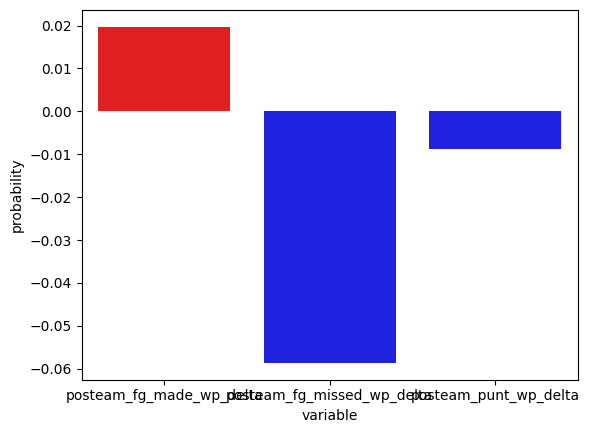

In [478]:
co = ['red' if (x ==max(t.probability)) else 'blue' for x in t['probability']]
sns.barplot(data=t, x=t['variable'], y=t['probability'] ,palette=co)

In [466]:
t = fg_punt_df[fg_punt_df['game_id']==2009091000]
t = t[t['play_id']==139]
#co = ['red' if (x >a) else 'blue' for x in t.values]
#t=t[play_columns]
#sns.barplot(data=t, color='red')

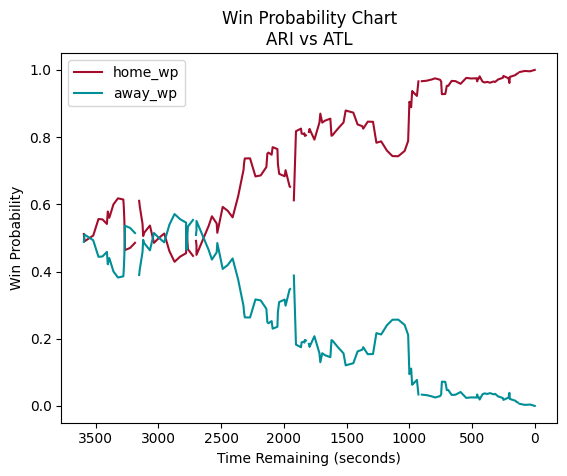

In [145]:
cols_graphic = ['home_wp','away_wp','game_seconds_remaining']
colors = []
for t in game_teams:
    colors.append(team_colors[team_colors["team"]==t]['color4'].tolist()[0])
graph_data = game_df[cols_graphic].set_index("game_seconds_remaining").sort_index(ascending=False)
graph_data.plot(color=colors)
plt.xlabel("Time Remaining (seconds)")
plt.ylabel("Win Probability")
plt.title(f"Win Probability Chart\n{teams[0]} vs {teams[1]}")
plt.gca().invert_xaxis()

In [146]:
graph_data

,home_wp,away_wp
game_seconds_remaining,,
3600.0,NaN,NaN
3594.0,0.511706,0.488294
3589.0,0.489823,0.510177
3519.0,0.507068,0.492932
3477.0,0.556337,0.443663
...,...,...
120.0,NaN,NaN
120.0,0.993740,0.006260
78.0,0.996956,0.003044


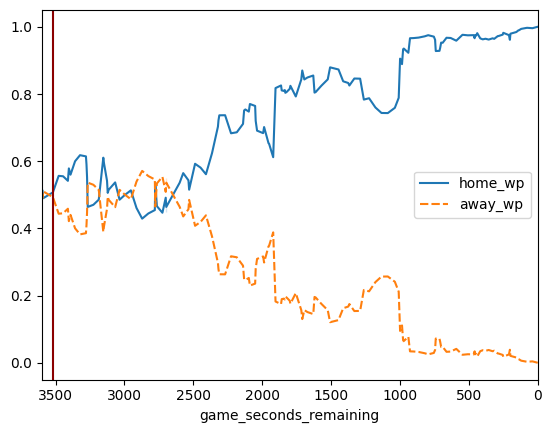

In [165]:
import matplotlib.pyplot as plt
ax=sns.lineplot(data=graph_data)
plt.xlim(3600,0)
#plt.vlines(3400, ymin=-1,ymax=1.2, colors='red',linestyles='solid')
ax.axvline(3519, color="darkred", linestyle="-", label="Valentine's Day")


In [148]:
import matplotlib.pyplot as plt
import matplotlib.patches as patches

In [149]:
def create_football_field(linenumbers=True,
                          endzones=True,
                          highlight_line=False,
                          highlight_line_number=50,
                          highlighted_name='Line of Scrimmage',
                          fifty_is_los=False,
                          figsize=(12, 6.33)):
    """
    Function that plots the football field for viewing plays.
    Allows for showing or hiding endzones.
    """
    rect = patches.Rectangle((0, 0), 120, 53.3, linewidth=0.1,
                             edgecolor='r', facecolor='darkgreen', zorder=0)

    fig, ax = plt.subplots(1, figsize=figsize)
    ax.add_patch(rect)

    plt.plot([10, 10, 10, 20, 20, 30, 30, 40, 40, 50, 50, 60, 60, 70, 70, 80,
              80, 90, 90, 100, 100, 110, 110, 120, 0, 0, 120, 120],
             [0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3,
              53.3, 0, 0, 53.3, 53.3, 0, 0, 53.3, 53.3, 53.3, 0, 0, 53.3],
             color='white')
    if fifty_is_los:
        plt.plot([60, 60], [0, 53.3], color='gold')
        plt.text(62, 50, '<- Player Yardline at Snap', color='gold')
    # Endzones
    if endzones:
        ez1 = patches.Rectangle((0, 0), 10, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ez2 = patches.Rectangle((110, 0), 120, 53.3,
                                linewidth=0.1,
                                edgecolor='r',
                                facecolor='blue',
                                alpha=0.2,
                                zorder=0)
        ax.add_patch(ez1)
        ax.add_patch(ez2)
    plt.xlim(0, 120)
    plt.ylim(-5, 58.3)
    plt.axis('off')
    if linenumbers:
        for x in range(20, 110, 10):
            numb = x
            if x > 50:
                numb = 120 - x
            plt.text(x, 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white')
            plt.text(x - 0.95, 53.3 - 5, str(numb - 10),
                     horizontalalignment='center',
                     fontsize=20,  # fontname='Arial',
                     color='white', rotation=180)
    if endzones:
        hash_range = range(11, 110)
    else:
        hash_range = range(1, 120)

    for x in hash_range:
        ax.plot([x, x], [0.4, 0.7], color='white')
        ax.plot([x, x], [53.0, 52.5], color='white')
        ax.plot([x, x], [22.91, 23.57], color='white')
        ax.plot([x, x], [29.73, 30.39], color='white')

    if highlight_line:
        hl = highlight_line_number + 10
        plt.plot([hl, hl], [0, 53.3], color='yellow')
        # plt.text(hl + 2, 50, '<- {}'.format(highlighted_name),
        #          color='yellow')
    return fig, ax

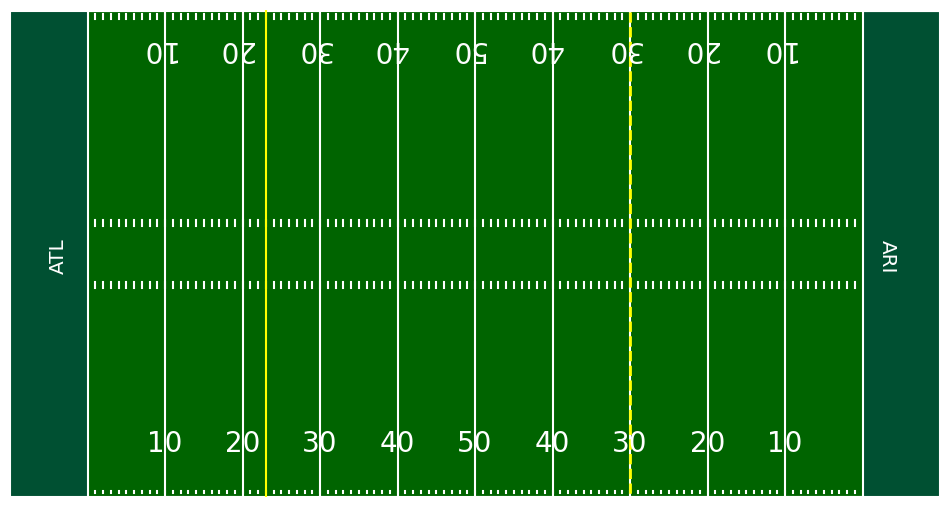

In [150]:
yl=23
fig, ax = create_football_field(highlight_line=True,
                                highlight_line_number=yl)

plt.xlim(0, 120)
plt.ylim(0, 53.5)
plt.vlines(x=80,
           ymin=-5,
           ymax=58.3,
           colors=["yellow","yellow"],
           linestyles="dashed",
           linewidth=2)#"dashed"

plt.text(5, 25, teams[1],
         size="x-large", 
         rotation=90,
         color="white")

plt.text(112, 25, teams[0],
         size="x-large", 
         rotation=270,
         color="white")

#im = plt.imread('../images/100px-Dallas_Cowboys.svg.png', format="png") # insert local path of the image.
# https://matplotlib.org/stable/api/_as_gen/matplotlib.axes.Axes.set_anchor.html#matplotlib.axes.Axes.set_anchor
#                  [left, bottom, width, height]
# newax = fig.add_axes([0.8, 0.8, 0.2, 0.2], anchor='E')#, zorder=-1)
#newax = fig.add_axes([0.56, 0.4, 0.2, 0.2], anchor='E')#, zorder=-1)
#newax.imshow(im)
#newax.axis('off')

#im = plt.imread('../images/100px-Houston_Texans_logo.svg.png', format="png") # insert local path of the image.
#newax = fig.add_axes([0.25, 0.4, 0.2, 0.2], anchor='W')#, zorder=-1)
#newax.imshow(im)
#newax.axis('off')

plt.show()